### This assignment may be worked individually or in pairs. 
### Enter your name/names here:

In [336]:
# Name(s) here: Ritu Gupta 

In [337]:
# headers
import pandas as pd
import matplotlib.pyplot as plt

# Assignment 2: Linear Regression and KNN Classifier

## Part 1: Linear regression with scikit-learn

In this part of the assignment, you will fit a linear regression model to an insurance dataset using the scikit-learn package. 

The insurance company would like to be able to estimate the annual medical expenditures they will need to pay for any customer, based on the customer's age, sex, BMI, # of children, whether they are a smoker, and their region of residence. 

Estimates from this model can be used to then determine how much to charge each customer for insurance (the more we think you'll cost us, the more we will charge you).

**Data Prep**

Q1. Read the dataset from 'medical-charges.txt' into a Pandas Dataframe. Display the head of the dataset. There should be 1338 rows and 7 columns. The target column (y) is the `charges` column.

In [338]:
# your code goes here
df = pd.read_csv("medical-charges.txt")
df = pd.DataFrame(df)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Q2. Notice that there are several categorical columns. You'll need to transform these to be able to do regression. Since `sex` and `smoker` are binary in this dataset, let's do them differently than `region` which has 4 options.

* Use the Pandas [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function to one-hot-encode `sex` and `smoker`. 
* Since these features are binary, we do not need to create two columns for each of them (i.e. we do not need both smoker_yes and smoker_no - just having a smoker_yes column will be sufficient), so use the `drop_first` parameter of get_dummies to create only a `smoker_yes` and a `sex_male` column. 
* Display the head of the dataframe.

In [339]:
# your code goes here
# one-hot encoding the specified columns
df = pd.get_dummies(df, columns=['sex','smoker'], drop_first=True)
df.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,False,True
1,18,33.770,1,southeast,1725.55230,True,False
2,28,33.000,3,southeast,4449.46200,True,False
3,33,22.705,0,northwest,21984.47061,True,False
4,32,28.880,0,northwest,3866.85520,True,False


Q3. Now one-hot encode the `region` feature by again using `get_dummies()`, but this time, even though we could drop one column, let's go ahead and explicitly keep all 4 values as columns (i.e. drop_first should be set to False). Display the head of the resulting dataframe.

In [340]:
# your code goes here
df = pd.get_dummies(df, columns=['region'], drop_first=False)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,False,True
1,18,33.770,1,1725.55230,True,False,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,False,True,False
3,33,22.705,0,21984.47061,True,False,False,True,False,False
4,32,28.880,0,3866.85520,True,False,False,True,False,False


Q4. An interesting thing to check with regression problems is whether any of the individual features correlate very strongly with the label. Use the `corr()` method on the dataframe to take a look at this.

Answer as a comment: Do you see any features with a strong correlation to the label?

In [341]:
# your code goes here
df.corr()

""" 
Using the target column 'charges,' it can be noted that smoker_yes has a strong correlation to the label
with a correlation of 0.787251. 
"""

" \nUsing the target column 'charges,' it can be noted that smoker_yes has a strong correlation to the label\nwith a correlation of 0.787251. \n"

Q5. Create a plot to show the difference in charges between the smokers and the non-smokers. 

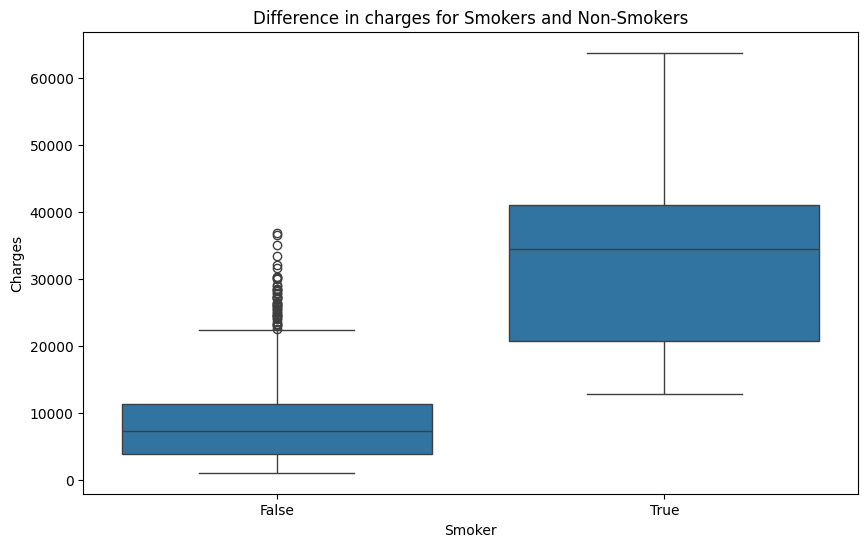

In [342]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker_yes', y='charges', data=df)
plt.title('Difference in charges for Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

Q6. Let's explore the relationship between `age` and `charges`. Create a scatter plot of all data points to show age vs charges. 

Answer as a comment: What do you notice about the nature of this relationship?

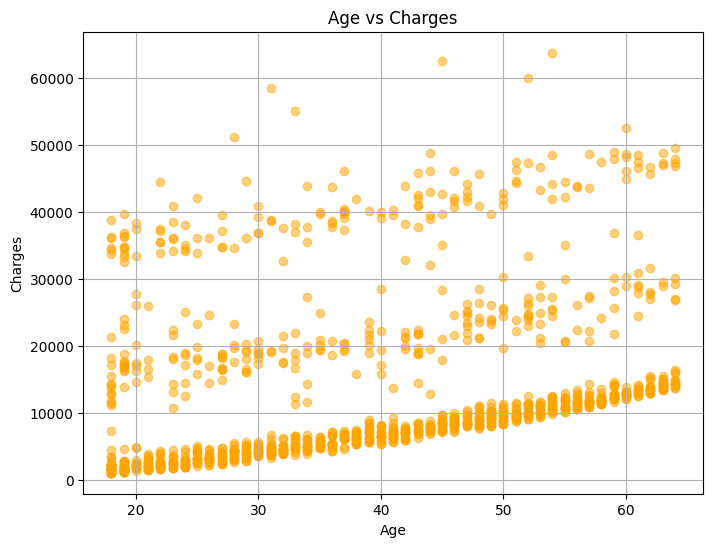

'\n\nWhat I notice about the nature of this relationship is that as age increases, so do the charges \n\n'

In [343]:
# your code goes here
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['charges'], color='orange', alpha=0.5)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

"""

What I notice about the nature of this relationship is that as age increases, so do the charges 

"""

#### Simple Linear Regression
**Fit a simple linear regression model to predict `charges` from `age`.**

Q7. 
* Grab the `age` column from the dataframe and call it something like `x`.
* Grab the `charges` column from the dataframe and call it something like `y`.
* When doing simple linear regression (one feature), you need to convert the features from a Series to a list of lists. You can do this by doing `x = x.values.reshape(-1,1)`, where the (-1,1) means (all rows, one column). 
* Do the same to the labels (`y = y.values.reshape(-1,1)`). 
* Verify that you have a list of lists for both x and y.

In [344]:
# your code goes here
x = df['age']
y = df['charges']

#converting the features from a series to a list of lists 
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

#verifying that they're a list of lists for both x and y 
print("Type of x:", type(x))
print("Type of y:", type(y))

Type of x: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


**Using the holdout method**

Q8. Use [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split your dataset into training and test sets. Do an 80%-20% split. Display how many records are in the training set and how many are in the test set. Set the random_state argument to your favorite number.

In [345]:
from sklearn.model_selection import train_test_split

# your code goes here
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 818)

#num records in the training and test set
print("# records in training set:", len(x_train))
print("# records in test set:", len(x_test))

print(" ")
print("With the random state variable being changed:")
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state= 18)

#num records in the training and test set
print("# records in training set:", len(x_train2))
print("# records in test set:", len(x_test2))

# records in training set: 1070
# records in test set: 268
 
With the random state variable being changed:
# records in training set: 1070
# records in test set: 268


Q9. Fit a simple linear regression model to the x and y data. This computes the B0 and B1 coefficients.
* Create a [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) object. 
* Call `fit` on it and pass in the training set.
* Print the slope and the intercept of the equation with the `.coef_` and `.intercept_` attributes. 

In [346]:
from sklearn.linear_model import LinearRegression

# your code goes here
model = LinearRegression()

#fitting the model to the training data
reg_model = model.fit(x_train, y_train)

# slope (coefficient) & intercept of lin regression equation
print("Slope:", reg_model.coef_)
print("Intercept:", reg_model.intercept_)


print(" ")
print("With the random state variable being changed:")
#fitting the model to the training data
reg_model2 = model.fit(x_train2, y_train2)

# slope (coefficient) & intercept of lin regression equation
print("Slope:", reg_model2.coef_)
print("Intercept:", reg_model2.intercept_)


Slope: [[270.80155307]]
Intercept: [2993.12697655]
 
With the random state variable being changed:
Slope: [[245.0088325]]
Intercept: [3541.33099148]


Q10. Now that you've fit the model on the training set, you can evaluate it on the test set. Call `predict` on the linear regression object and pass in the test set. Save the return value - these are all of the predicted values under the model for the test set. 

Compute some metrics to see how well this model fits the test data. Use `sklearn.metrics` to print out the MAE, MSE, RMSE, and R2 for the test set under this model. Remember that you have the actual y values for your test set, up in Q8.  

In [347]:
import sklearn.metrics as metrics
import numpy as np

# your code goes here
y_pred = reg_model.predict(x_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

#metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


print(" ")
print("With the random state variable being changed:")
# your code goes here
y_pred2 = reg_model2.predict(x_test2)

mae2 = metrics.mean_absolute_error(y_test2, y_pred2)
mse2 = metrics.mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2)
r22 = metrics.r2_score(y_test2, y_pred2)

#metrics
print("Mean Absolute Error (MAE):", mae2)
print("Mean Squared Error (MSE):", mse2)
print("Root Mean Squared Error (RMSE):", rmse2)
print("R-squared (R2):", r22)

Mean Absolute Error (MAE): 8125.311158719801
Mean Squared Error (MSE): 106523843.68475191
Root Mean Squared Error (RMSE): 10321.038885923836
R-squared (R2): 0.04250303603468808
 
With the random state variable being changed:
Mean Absolute Error (MAE): 9256.066419478582
Mean Squared Error (MSE): 140281856.6812587
Root Mean Squared Error (RMSE): 11844.064196096655
R-squared (R2): 0.10959394786346732


Q11. Let's see what the best fit line looks like with the test data. Scatter-plot the test data (x_test, y_test). Then line-plot the model predictions for the test data (x_test, y_test_preds). 

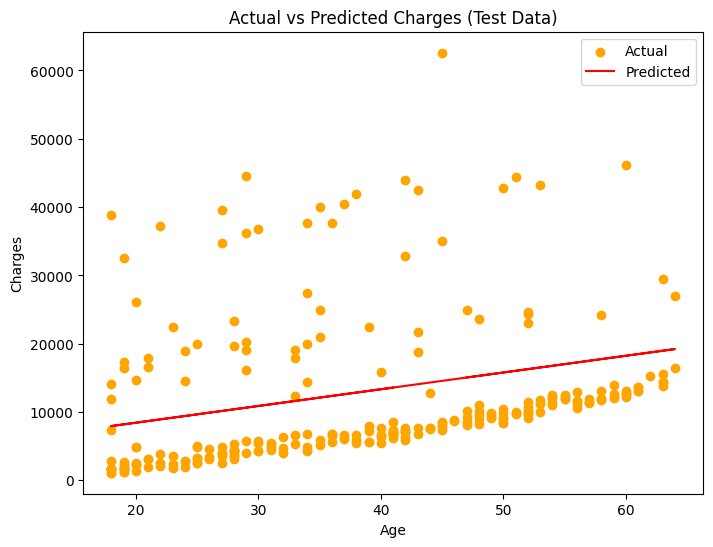

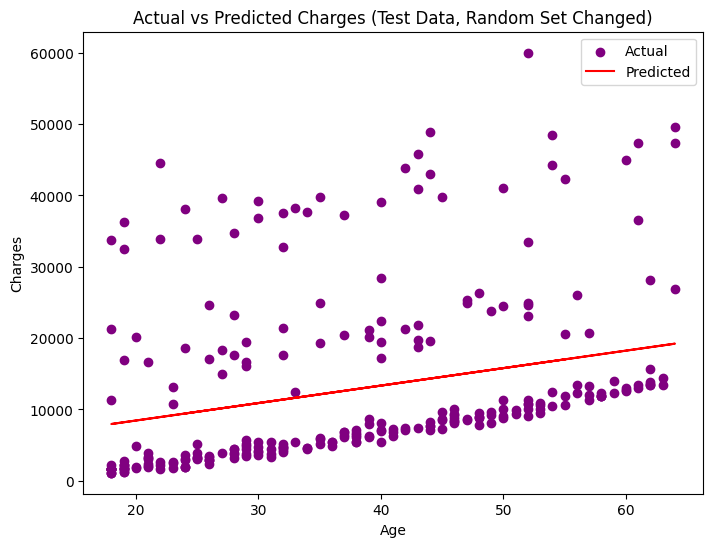

In [348]:
# your code goes here
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='orange', label='Actual')
plt.xlabel('Age')
plt.ylabel('Charges')

#line plot of the model's predictions for the data
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Charges (Test Data)')
plt.legend()
plt.show()


"""
With the random state variable being changed 
"""
plt.figure(figsize=(8, 6))
plt.scatter(x_test2, y_test2, color='purple', label='Actual')
plt.xlabel('Age')
plt.ylabel('Charges')

#line plot of the model's predictions for the data
plt.plot(x_test2, y_pred2, color='red', label='Predicted')
plt.title('Actual vs Predicted Charges (Test Data, Random Set Changed)')
plt.legend()
plt.show()


Q12. Now, go back up to your Q8, change the random_state to a different number, and re-run Q9, Q10, Q11. 

Answer as a comment: What happened and why?

In [349]:
# answer as a comment here

"""
When the random_state number was changed from 818 to 18, some things that changed were the slope (decreased from 
818 to 18) and intercept (increased from 818 to 18). Additionally, the MAE, MSE, RMSE and R2 all increased from 818
to 18. In the plot, there's not a huge noticeable difference with the predicted values, but it does appear that 
less values fall below the prediction line when the random number was changed to 18, although it does seem that 
there are less values that are close to the prediction line. 
"""

"\nWhen the random_state number was changed from 818 to 18, some things that changed were the slope (decreased from \n818 to 18) and intercept (increased from 818 to 18). Additionally, the MAE, MSE, RMSE and R2 all increased from 818\nto 18. In the plot, there's not a huge noticeable difference with the predicted values, but it does appear that \nless values fall below the prediction line when the random number was changed to 18, although it does seem that \nthere are less values that are close to the prediction line. \n"

**Using cross-validation**

Q13. We've discussed and seen the issues that can happen when we do a single hold-out test set. Cross validation is a better, more robust way to evaluate our models. Use `sklearn.model_selection.cross_val_score` to perform 5-fold cross validation on a simple linear regression model. 

You will pass the FULL dataset (x and y from before the train/test split in Q8) into `cross_val_score` which will automatically divide it into the number of folds you tell it to, fit a linear regression model to the training set for each fold, and test it on the test set for each fold. It will return a numpy array with the R2 on the test set for each fold. Average these R2 scores to print out the generalization estimate of the model.

On average, after 5 trials with 5 different test sets, this is how well we think a linear regression of using `age` to predict `charges` will work. 

In [350]:
from sklearn.model_selection import cross_val_score

# your code goes here
scores = cross_val_score(model, x, y, cv=5)
print("R-squared scores:", scores)
avg_r2 = scores.mean()
print("Average R-squared score:", avg_r2)

R-squared scores: [0.10358243 0.11694993 0.07060307 0.10318829 0.04673836]
Average R-squared score: 0.08821241573294043


#### Multiple Linear Regression
**Fit a multiple linear regression model to predict `charges` from `age` and `smoker`.**

Q14. Now let's see if we can get a better model by including another feature.
* From the one-hot-encoded dataframe (the result of Q3), grab both the `age` and `smoker_yes` columns. Call it something like x. 
* (No need to call a reshape this time, since it is multi-dimensional data now.)
* You already have the y's.
* Create a new `sklearn.linear_model.LinearRegression` object. (Or you can re-use the one you already have.)
* Pass it all into a `sklearn.model_selection.cross_val_score` with a 5-fold CV.
* Print out the average R2.

Answer as a comment: What happens when you include `smoker_yes`?

In [351]:
# your code goes here
#age and smoker_yes columns
x = df[['age', 'smoker_yes']]

#five-fold cross-validation
scores = cross_val_score(model, x, y, cv=5)
avg_r2 = scores.mean()
print("Average R-squared score with age and smoker_yes:", avg_r2)



#When smoker_yes is included, the average r2 score significantly increases.


Average R-squared score with age and smoker_yes: 0.7191692504028052


Q15. Let's go one more step and see if including ALL of our features is even better at predicting the `charges` than using just `age` and `smoker`.

* From the one-hot-encoded dataframe (the result of Q3), grab all the features, but NOT the target. Call it something like x.
* (No need to call a reshape this time, since it is multi-dimensional data now.)
* You already have the y's.
* Create a new sklearn.linear_model.LinearRegression object. (Or you can re-use the one you already have.)
* Pass it all into a sklearn.model_selection.cross_val_score with a 5-fold CV.
* Print out the average R2 and the adjusted R2.

Answer as a comment: What happens when you use ALL of the features?

In [352]:
#calculating the adjusted r2 value
def adjusted_r2(r2, n, p):
    return (1 - (1 - r2) * ((n - 1) / (n - p - 1)))

In [353]:
# your code goes here
x_without = df.drop(columns = 'charges')

#5-fold cross-validation
scores_wo_tgt = cross_val_score(model, x_without, y, cv=5)
avg_r2 = scores_wo_tgt.mean()
print("Average R-squared score:", avg_r2)
print("Adjusted-R2:", adjusted_r2(scores_wo_tgt, x_without.shape[0], x_without.shape[1]))

#Answer: When all of the features are used, the average r2 value continues to increase.

Average R-squared score: 0.7468616243473741
Adjusted-R2: [0.75986533 0.70450427 0.77655934 0.7308832  0.75391826]


Q16. Build the final model on the entire dataset. 
* You should already have your x from the previous question (Q15).
* You already have the y's.
* Create a new `sklearn.linear_model.LinearRegression` object, or you can re-use the one you already have.
* Call `fit` and pass in all the data (x, y).
* Print out the coefficients and the intercept of the fitted model. The coefficients correspond to the the order in which the features are in the dataframe (x).

This defines your multiple linear regression equation! 

In [354]:
# your code goes here
#fitting the model using all of the data
final_model = model.fit(x_without, y)
print("Coefficients:", final_model.coef_)
print("Intercept:", final_model.intercept_)

Coefficients: [[  256.85635254   339.19345361   475.50054515  -131.3143594
  23848.53454191   587.00923503   234.0453356   -448.01281436
   -373.04175627]]
Intercept: [-12525.5478112]


## Part 2: K-Nearest Neighbors from scratch

In this part of the assignment you'll implement the K-Nearest Neighbors (KNN) classification algorithm to classify patients as either having or not having diabetic retinopathy. For this task we'll be using the same Diabetic Retinopathy data set which was used in the previous assignment on decision trees. 

You may use the following function to print a confusion matrix:

In [355]:
def print_confusion_matrix(TP, FN, FP, TN):
    
    table_data = [[TP,FN],[FP,TN]]
    df = pd.DataFrame(table_data, columns =['Predicted 1','Predicted 0'])
    df = df.rename(index={0: 'Actual 1', 1: 'Actual 0'})
    display(df)

In [356]:
# you may use these constants if you want
LABEL_COLUMN = 19
BINARY_COLUMNS = {0,1,18}

Q1. Normalize the data so that each feature value lies between `[0-1]`.

In class, we talked about why scaling the data is critical to KNN. We also talked about how data scaling should be done *inside the cross validataion loop*. This means that the scaling parameters should be based on the **training set only**, in order to prevent data leakage. Then the test data will need to be scaled, using the parameters found on the **training** data.

Fill in the function to take in a training dataset and a test dataset and normalize them correctly. Return the normalized datasets.

Caution: Return NEW datasets that have been normalized - do not normalize the datasets in-place, so that this can be run numerous times without altering the original data or normalizing already normalized data.

Hint: When using dataframes, you can do this without a loop!

In [357]:
def normalize_data(train, test):
    #min and max vals for each feature in the training set
    min_vals = train.min()
    max_vals = train.max()

    train_norm = (train - min_vals) / (max_vals - min_vals)
    test_norm = (test - min_vals) / (max_vals - min_vals)

    return train_norm, test_norm

Q2. The distance calculation method is central to the KNN algorithm. In this assignment you'll be using the Euclidean distance. 

Implement a function that takes in one data point (as a list or a series), and the training data (as a dataframe), and calculates the Euclidian distance from the single data point to each of the data points in the training data.

Add a column to the dataframe called `distance` that contains the Euclidian distance value from each row to the single data point, and return the dataframe with this new column filled in. 


Hint: For KNN, the distance calculations are the most time-consuming part of the algorithm. Even though computing Euclidian distance seems like a simple, and therefore quick, calculation, running it thousands of times, inside of a nested 5-fold cross-validation for example, can cause this algorithm to take a very long time to run, depending on your implementation. So you want to do this efficiently.

Remember, you almost never need to loop a Dataframe! Pandas DataFrames have been specifically optimized for fast operations on large datasets, by [vectorizing](https://www.quantifisolutions.com/vectorization-part-2-why-and-what) calculations across all rows at once.

If you use a DataFrame, you should not write a loop to calculate each of the Euclidian distances one at a time. Look at [this post](https://stackoverflow.com/questions/46908388/find-euclidean-distance-from-a-point-to-rows-in-pandas-dataframe?rq=1) for more info.

Caution: Be careful not to use the label in your distance calculation.

In [358]:
def get_distances(point, df):
    df_features = df.iloc[:, :-1]  # Exclude label
    point_features = point[:-1]   

    differences = df_features.sub(point_features, axis=1)

    #euclidean distances
    distances = np.linalg.norm(differences, axis=1)

    #add these as a new column to the df
    df_with_distances = df.copy()
    df_with_distances["distance"] = distances

    if df_with_distances.isna().values.any():
        raise ValueError("NaN found when calculating distances")

    return df_with_distances

Q3. Build your KNN classifier.

This function takes in a training set (as a dataframe), a test set (as a dataframe), and a k to use, and classifies all data points in the test set, using the data in the training set and the given k.

It should return the predicted labels for the test set as a list.

Caution: Remember to normalize your data before doing distance calculations.

In [359]:
def run_knn(train_set, test_set, k):
    train_set, test_set = normalize_data(train_set, test_set)
    
    #array to store predictions
    predictions = np.zeros(len(test_set))
    
    for i in range(len(test_set)):
        test_point = test_set.iloc[i]
        
        #dist btwn the test pt & all pts in the training set
        distances = np.linalg.norm(train_set.drop(columns=[LABEL_COLUMN]) - test_point.drop(index=[LABEL_COLUMN]), axis=1)
        
        nearest_indices = np.argsort(distances)[:k]
        
        #extract the labels of the nearest neighbors
        nearest_labels = train_set.iloc[nearest_indices][LABEL_COLUMN]
        
        #predicting the label
        predicted_label = nearest_labels.mode()[0]
        
        #predicted label to the corresponding index
        predictions[i] = predicted_label
    
    return predictions

Q4. Find the best value of k for this data. 

Try k ranging from 1 to 10 (odds only). For each k value, use a 5-fold cross validation to evaluate the accuracy with that k. In each fold of CV, divide your data into a training set and a validation set. Print out the best value of k and the accuracy achieved with that value. Return the best value of k. If there is a tie for best k, use the lowest of the k values.

Hint: This is the *inner* loop of a nested cross validation.

In [360]:
def find_best_k(data):
    best_k, highest_accuracy = -1, 0
    
    fold_size = len(data) // 5
    
    #loop through odd values of k from 1 to 9
    for k in range(1, 10, 2):
        total_correct = 0
        
        for fold in range(5):
            fold_start = fold * fold_size
            fold_end = (fold + 1) * fold_size
            training_set = pd.concat([data.iloc[:fold_start], data.iloc[fold_end:]])
            testing_set = data.iloc[fold_start:fold_end]
            
            #predicting the labels using KNN
            predictions = run_knn(training_set, testing_set, k)
            
            #counting the correct predictions
            correct = sum(predictions == testing_set[LABEL_COLUMN])
            total_correct += correct
        
        #updating best_k if applicable
        accuracy = total_correct / len(data)
        if accuracy > highest_accuracy:
            best_k = k
            highest_accuracy = accuracy

    return best_k

Q5. Now measure the accuracy of your classifier using 5-fold cross validation. 

In each fold of this CV, divide your data into a training set and a test set. The training set should get sent through your code for Q4, resulting in a value of k to use. Using that k, calculate an accuracy on the test set. You will average the accuracy over all 5 folds to obtain the final accuracy measurement. 

Print the accuracy, the confusion matrix, and the precision and recall for class label 1 (patients that have been diagnosed with the disease).

In [361]:
import time
from sklearn.metrics import confusion_matrix, precision_score, recall_score

def run_CV(filename):
    # Read in data
    data = pd.read_csv(filename, header=None)
    print("Dataset size:", data.shape)

    start_time = time.time()
    accuracies = np.zeros(5)
    TP, FN, FP, TN = 0, 0, 0, 0

    #five-fold cross validation
    fold_size = len(data) // 5
    for f in range(5):
        fold_start = f * fold_size
        fold_end = (f + 1) * fold_size
        
        training_set = pd.concat([data.iloc[:fold_start], data.iloc[fold_end:]])
        testing_set = data.iloc[fold_start:fold_end]
    
        best_k = find_best_k(training_set)
        predictions = run_knn(training_set, testing_set, best_k)
        
        #finding accuracy
        accuracy = sum(predictions == testing_set[LABEL_COLUMN]) / len(testing_set)
        accuracies[f] = accuracy
        
        #confusion matrix computations
        TP += sum((predictions == 1) & (testing_set[LABEL_COLUMN] == 1))
        FN += sum((predictions == 0) & (testing_set[LABEL_COLUMN] == 1))
        FP += sum((predictions == 1) & (testing_set[LABEL_COLUMN] == 0))
        TN += sum((predictions == 0) & (testing_set[LABEL_COLUMN] == 0))

    avg_accuracy = np.mean(accuracies)
    print(f"Accuracies: {accuracies} | Avg: {avg_accuracy}")
    print_confusion_matrix(TP, FN, FP, TN)

    end_time = time.time()
    print("\nTotal time (seconds):", end_time - start_time)

run_CV("messidor_features.txt")

Dataset size: (1150, 20)
Accuracies: [0.6173913  0.62173913 0.64347826 0.59565217 0.62608696] | Avg: 0.6208695652173912


,Predicted 1,Predicted 0
Actual 1,363,248
Actual 0,188,351



Total time (seconds): 8.768813133239746
